# DMA 

### Laminato quasi simmetrico 11 strati + 1(rc 200)


| spessore | ply    | tipo           | oientamento |
|----------|--------|----------------|-------------|
| 0.26     | RC-200 | Tessuto (fine) | 0/90        |
| 0.49     | RC-400 | Tessuto        | 0/90        |
| 0.47     | XC-400 | c-ply          | -45/+45     |
| 0.33     | UC-300 | unidirezionale | 0           |
| 0.33     | UC-300 | uni            | 0           |
| 0.33     | UC-300 | uni            | 0           |
| 0.49     | RC-400 | Tessuto        | 0/90        |
| 0.33     | UC-300 | uni            | 0           |
| 0.33     | UC-300 | uni            | 0           |
| 0.33     | UC-300 | uni            | 0           |
| 0.47     | XC-400 | C-ply          | -45/45      |
| 0.49     | RC-400 | Tessuto        | 0/90        |

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from Modulo_DMA import estrai,plottaggio,media,dispersione
from Composito import get_laminate,Q_ply,get_engineering_constants,get_compliance

f_min = 0
f_max = 100

# Variabili ausiliarie => nome file
name = []
name_2N = []
name_meta = []
name_2N_meta = []

for i in range(1,6):
    name.append(f"CFRP_f1_100_5_1N_{i}")
    name.append(f"CFRP_f1_100_5_1N_dietro_{i}")
    name_2N.append(f"CFRP_f1_100_5_2N_{i}")
    name_2N.append(f"CFRP_f1_100_5_2N_dietro_{i}")
    name_2N_meta.append(f"CFRP_f1_100_5_2N_{i}")
    name_meta.append(f"CFRP_f1_100_5_1N_{i}")

rc_200 = {'s':0.26,'Ex':53522,'Ey':53522,'v':0.03,'G':2929,'fabric':True,'theta':0,'meta':['rc_200','tessuto (fine)']}
rc_400 = {'s':0.49,'Ex':53522,'Ey':53522,'v':0.03,'G':2929,'fabric':True,'theta':0,'meta':['rc_400','tessuto']}
xc_400 = {'s':0.47,'Ex':57770,'Ey':57770,'v':0.03,'G':3186,'fabric':True,'theta':45,'meta':['xc_400','c-ply (-45/+45)']}
uc_300 = {'s':0.33,'Ex':118454,'Ey':7104,'v':0.29,'G':3531,'fabric':False,'theta':0,'meta':['uc_300','unidirezionale']}


spessore nominale

In [2]:
laminato = [rc_200,rc_400,xc_400,uc_300,uc_300,uc_300,rc_400,uc_300,uc_300,uc_300,xc_400,rc_400]
s = 0
for lamina in laminato: # definisco lo Spessore
    print(lamina['meta'])
    s += lamina['s']
print(s)

['rc_200', 'tessuto (fine)']
['rc_400', 'tessuto']
['xc_400', 'c-ply (-45/+45)']
['uc_300', 'unidirezionale']
['uc_300', 'unidirezionale']
['uc_300', 'unidirezionale']
['rc_400', 'tessuto']
['uc_300', 'unidirezionale']
['uc_300', 'unidirezionale']
['uc_300', 'unidirezionale']
['xc_400', 'c-ply (-45/+45)']
['rc_400', 'tessuto']
4.65


In [3]:
normalizza = False
flag_normalizza = 's' #s'

# Provino A

spostamento di dma/provino 1a/ massimo 0.110212 [mm]
spostamento di dma/provino 3a/ massimo 0.101837 [mm]
spostamento di dma/provino 12a/ massimo 0.110282 [mm]


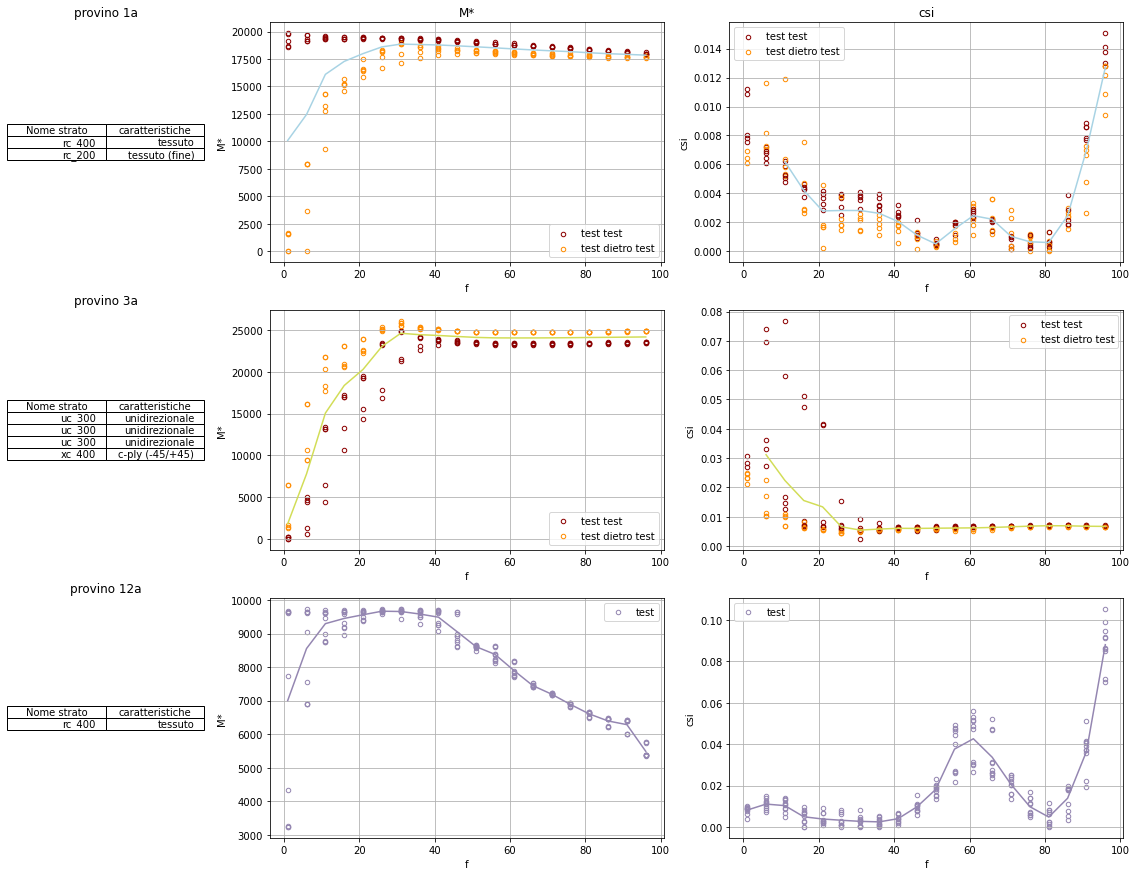

** Confonto prove provino 1A del 22/3 e quelle di febbraio
spostamento di dma/provino 1a vecchie/ massimo 0.14837799999999998 [mm]


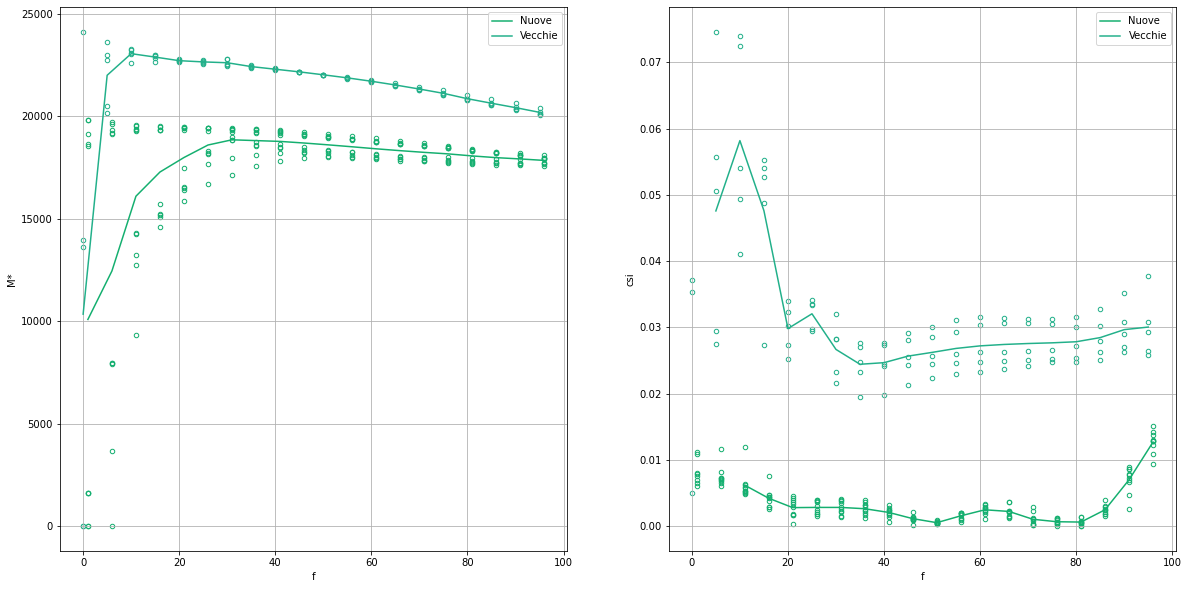

In [4]:
path_base = r'dma/provino 1a/'
laminato_provino_1a = {'name':'provino 1a','s':0.95,'w':12.41,'struttura':[rc_400,rc_200]}

data_provino_1a = estrai(path_base,1,name=name,normalizza = normalizza,s = laminato_provino_1a[flag_normalizza])
path_base = r'dma/provino 3a/'

laminato_provino_3a =  {'name':'provino 3a','s':2.25,'w':12.39,'struttura':[uc_300,uc_300,uc_300,xc_400]}
data_provino_3a = estrai(path_base,1,name=name,normalizza = normalizza,s = laminato_provino_3a[flag_normalizza])
path_base = r'dma/provino 12a/'
laminato_provino_12a = {'name':'provino 12a','s':0.69,'w':11.98,'struttura':[rc_400]}

data_provino_12a = estrai(path_base,1,name=name,normalizza = normalizza,s = laminato_provino_12a[flag_normalizza])
#
#
widths = [1, 2, 2]
gs_kw = dict(width_ratios=widths)

fig,ax = plt.subplots(3,3,figsize=(20,3*5),gridspec_kw=gs_kw)
columns = ('Nome strato','caratteristiche')

ax[0][0].table(cellText=[ply['meta'] for ply in laminato_provino_1a['struttura']],colLabels=columns,loc='center')
ax[0][0].axis('off')
ax[0][0].set_title('provino 1a')
plottaggio(data_provino_1a,ax[0][1],ax[0][2],f_min = f_min,flag_colore = 2,flag_title = True)
(_,_,D,s) = get_laminate(laminato_provino_1a['struttura'])
#ax[0][1].hlines(D[0,0]*(12/(s**3)),f_min,f_max)


ax[1][0].table(cellText=[ply['meta'] for ply in laminato_provino_3a['struttura']],colLabels=columns,loc='center')
ax[1][0].axis('off')
ax[1][0].set_title(laminato_provino_3a['name'])
plottaggio(data_provino_3a,ax[1][1],ax[1][2],f_min = f_min,flag_colore = 2)

ax[2][0].table(cellText=[ply['meta'] for ply in laminato_provino_12a['struttura']],colLabels=columns,loc='center')
ax[2][0].axis('off')
ax[2][0].set_title('provino 12a')
plottaggio(data_provino_12a,ax[2][1],ax[2][2],f_min = f_min,flag_colore = 1)
plt.show()

print('** Confonto prove provino 1A del 22/3 e quelle di febbraio')
path_base = r'dma/provino 1a vecchie/'
data_provino_1a_old = estrai(path_base,1,name=name_meta,normalizza = True,s = laminato_provino_1a['s'])
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
plottaggio(data_provino_1a,ax1,ax2,f_min = f_min,flag_colore = 1)
plottaggio(data_provino_1a_old,ax1,ax2,f_min = f_min,flag_colore = 1)
ax1.legend(['Nuove','Vecchie'])
ax2.legend(['Nuove','Vecchie'])
plt.show()



## Provino B

spostamento di dma/provino 1b/ massimo 0.160304 [mm]
spostamento di dma/provino 1b/ massimo 0.10912700000000002 [mm]


C:\Users\Rodo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


spostamento di dma/provino 1-2b/ massimo 0.169031 [mm]
spostamento di dma/provino 3b/ massimo 0.112324 [mm]
spostamento di dma/provino 4b/ massimo 0.00786846 [mm]
spostamento di dma/provino 4b  vecchie/ massimo 0.10643299999999999 [mm]
spostamento di dma/provino 5b/ massimo 0.29247199999999995 [mm]


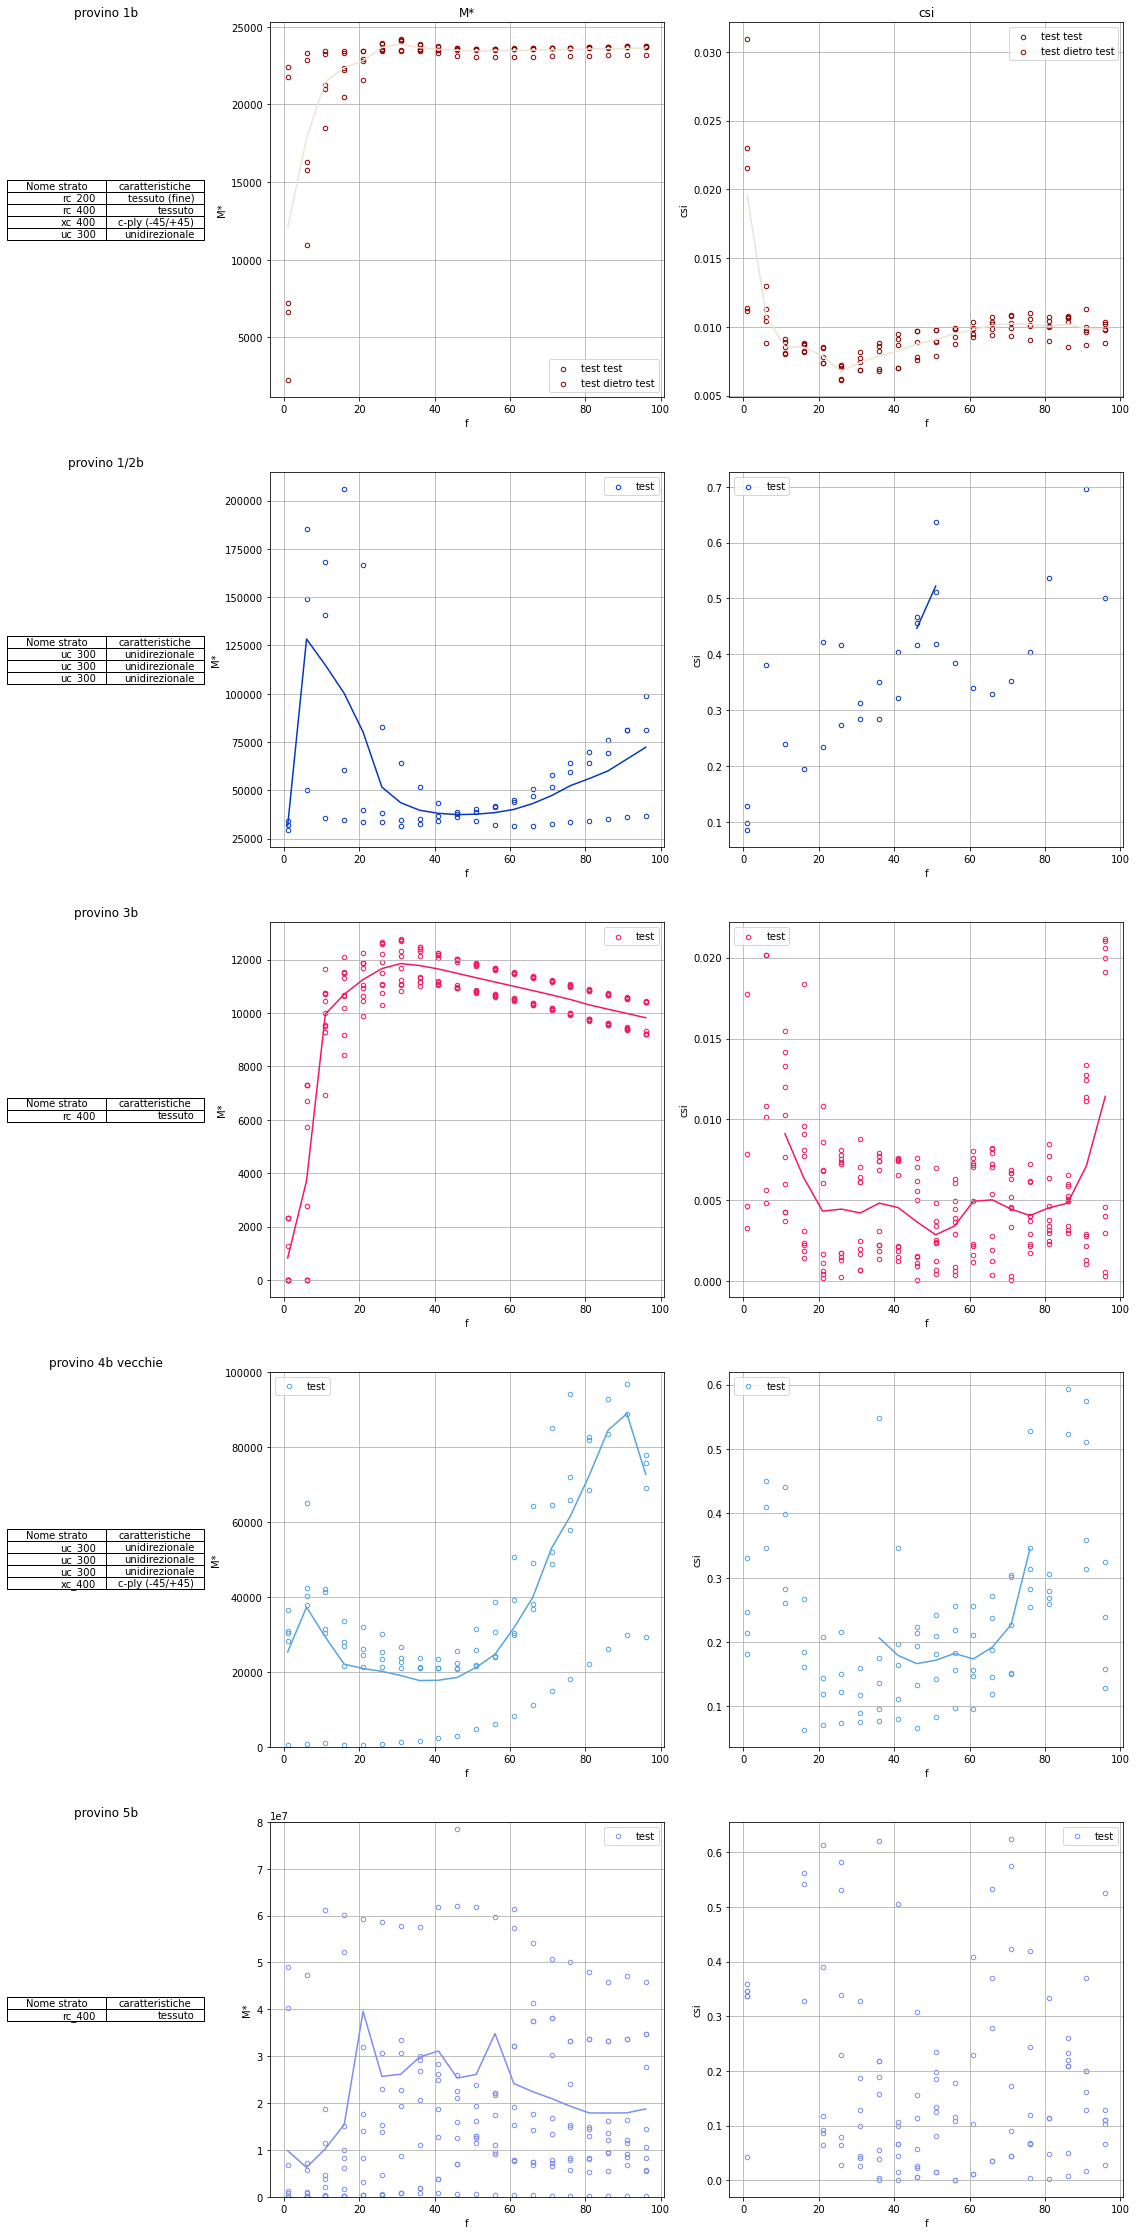

*Confronto 3b vecchio e nuovo


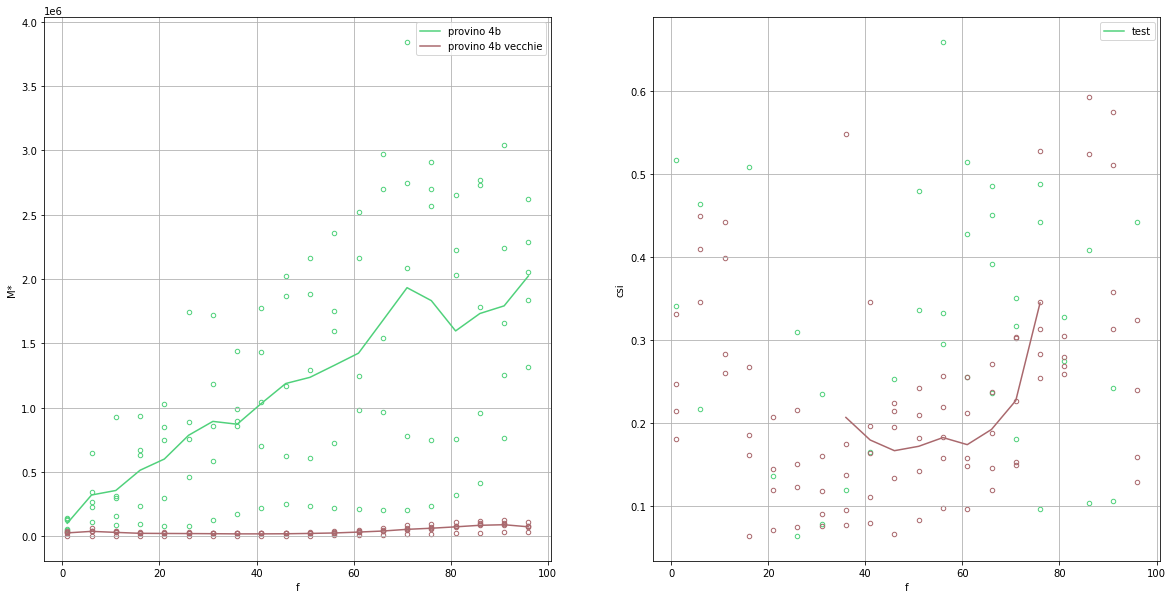

In [5]:

#
path_base = r'dma/provino 1b/'
laminato_provino_1b = {'name':'provino 1b','s':2.42,'w':12.53,'struttura':[rc_200,rc_400,xc_400,uc_300]}

data_provino_1b = estrai(path_base,1,name=name_meta,normalizza = normalizza,s = laminato_provino_1b[flag_normalizza])
data_provino_1b_2N = estrai(path_base,1,name=name_2N,normalizza = normalizza,s = laminato_provino_1b[flag_normalizza])

path_base = r'dma/provino 1-2b/'
name_temp = []
name_temp = name_meta[:]
name_temp.remove('CFRP_f1_100_5_1N_1')
name_temp.remove('CFRP_f1_100_5_1N_5')
laminato_provino_1_2b = {'name':'provino 1/2b','s':2.12,'w':6.95,'struttura':[uc_300,uc_300,uc_300]}

data_provino_1_2b = estrai(path_base,1,name=name_temp,normalizza = normalizza,s = laminato_provino_1_2b[flag_normalizza])
path_base = r'dma/provino 3b/'
laminato_provino_3b = {'name':'provino 3b','s':0.66,'w':12.12,'struttura':[rc_400]}
data_provino_3b = estrai(path_base,1,name=name,normalizza = normalizza,s = laminato_provino_3b[flag_normalizza])
path_base = r'dma/provino 4b/'
laminato_provino_4b = {'name':'provino 4b','s':2.21,'w':12.3,'struttura':[uc_300,uc_300,uc_300,xc_400]}

data_provino_4b = estrai(path_base,1,name=name_meta,normalizza = normalizza,s = laminato_provino_4b[flag_normalizza])
path_base = r'dma/provino 4b  vecchie/'
data_provino_4b_old = estrai(path_base,1,name=name_2N_meta,normalizza = normalizza,s = laminato_provino_4b[flag_normalizza])
path_base = r'dma/provino 5b/'
laminato_provino_5b = {'name':'provino 5b','s':0.68,'w':12.61,'struttura':[rc_400]}
data_provino_5b = estrai(path_base,1,name=name,normalizza = normalizza,s = laminato_provino_5b[flag_normalizza])
## ---------------------------------------------------------------------
fig,ax = plt.subplots(5,3,figsize=(20,4*10),gridspec_kw=gs_kw)

ax[0][0].table(cellText=[ply['meta'] for ply in laminato_provino_1b['struttura']],colLabels=columns,loc='center')
ax[0][0].axis('off')
ax[0][0].set_title('provino 1b')
plottaggio(data_provino_1b,ax[0][1],ax[0][2],f_min = f_min,flag_colore = 2,flag_title = True)

ax[1][0].table(cellText=[ply['meta'] for ply in laminato_provino_1_2b['struttura']],colLabels=columns,loc='center')
ax[1][0].axis('off')
ax[1][0].set_title('provino 1/2b')
plottaggio(data_provino_1_2b,ax[1][1],ax[1][2],f_min = f_min,flag_colore = 1)

ax[2][0].table(cellText=[ply['meta'] for ply in laminato_provino_3b['struttura']],colLabels=columns,loc='center')
ax[2][0].axis('off')
ax[2][0].set_title('provino 3b')
plottaggio(data_provino_3b,ax[2][1],ax[2][2],f_min = f_min,flag_colore = 1)


ax[3][0].table(cellText=[ply['meta'] for ply in laminato_provino_4b['struttura']],colLabels=columns,loc='center')
ax[3][0].axis('off')
ax[3][0].set_title('provino 4b vecchie')
plottaggio(data_provino_4b_old,ax[3][1],ax[3][2],f_min = f_min,flag_colore = 1)
y_lim = 0.1*10**6
ax[3][1].set_ylim([0,y_lim])

ax[4][0].table(cellText=[ply['meta'] for ply in laminato_provino_5b['struttura']],colLabels=columns,loc='center')
ax[4][0].axis('off')
ax[4][0].set_title('provino 5b')
plottaggio(data_provino_5b,ax[4][1],ax[4][2],f_min = f_min,flag_colore = 1)
y_lim = 0.8*10**8
ax[4][1].set_ylim([0,y_lim])

plt.show()

print("*Confronto 3b vecchio e nuovo")
fig,ax = plt.subplots(1,2,figsize=(20,10))
plottaggio(data_provino_4b,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_4b_old,ax[0],ax[1],f_min = f_min,flag_colore = 1)
ax[0].legend(['provino 4b','provino 4b vecchie'])
plt.show()

# Provino C

spostamento di dma/provino 2c/ massimo 0.106462 [mm]
spostamento di dma/provino 3c/ massimo 0.07626229999999999 [mm]
spostamento di dma/provino 4c/ massimo 0.13662100000000002 [mm]


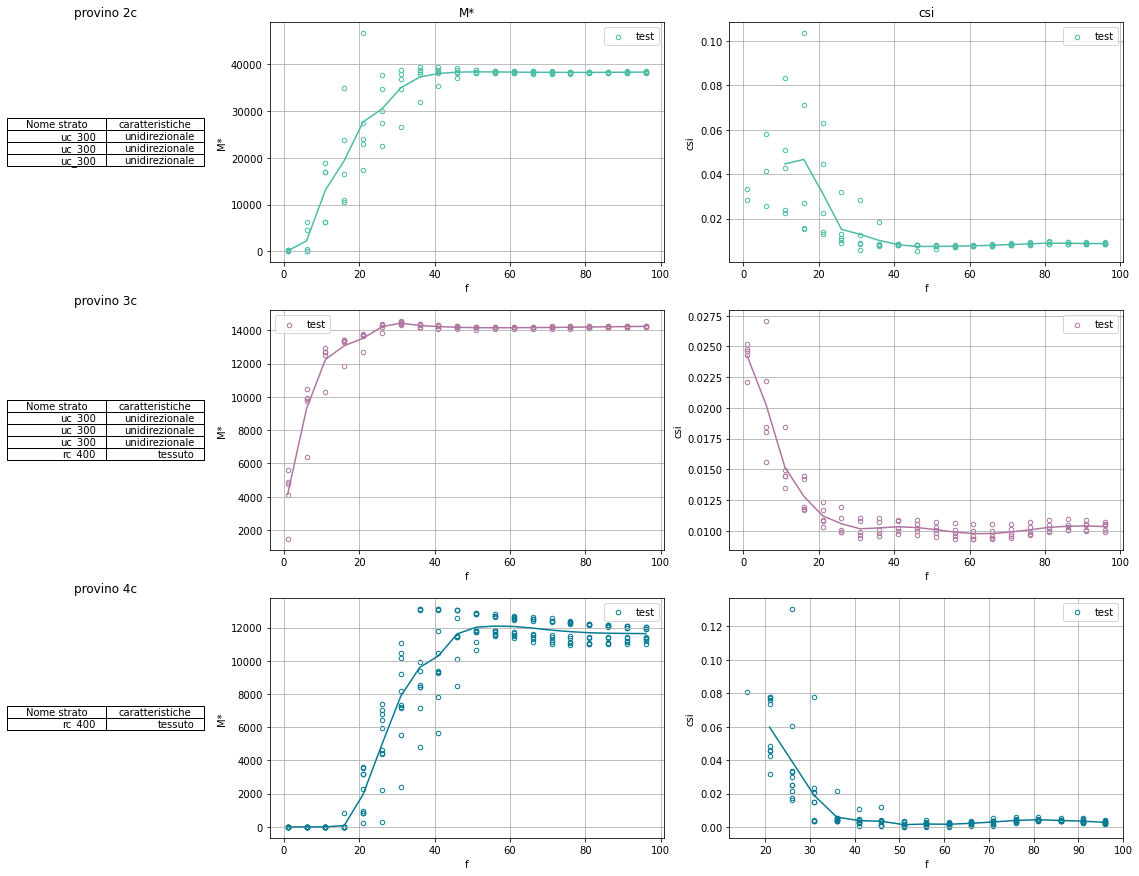

In [6]:
path_base = r'dma/provino 2c/'
laminato_provino_2c = {'name':'provino 2c','s':1.53,'w':3.13,'struttura':[uc_300,uc_300,uc_300]}

data_provino_2c = estrai(path_base,1,name=name_meta,normalizza = normalizza,s = laminato_provino_2c[flag_normalizza])

path_base = r'dma/provino 3c/'
laminato_provino_3c = {'name':'provino 3c','s':1.78,'w':11.66,'struttura':[uc_300,uc_300,uc_300,rc_400]} # [resina,resina,uc_300,resina,resina,uc_300,resina,resina,uc_300,resina,resina]

data_provino_3c = estrai(path_base,1,name=name_meta,normalizza = normalizza,s = laminato_provino_3c[flag_normalizza])

path_base = r'dma/provino 4c/'
laminato_provino_4c = {'name':'provino 4c','s':0.94,'w':11.46,'struttura':[rc_400]}

data_provino_4c = estrai(path_base,1,name=name,normalizza = normalizza,s = laminato_provino_4c[flag_normalizza])
## ---------------------------------------------------------------------
fig,ax = plt.subplots(3,3,figsize=(20,3*5),gridspec_kw=gs_kw)

ax[0][0].table(cellText=[ply['meta'] for ply in laminato_provino_2c['struttura']],colLabels=columns,loc='center')
ax[0][0].axis('off')
ax[0][0].set_title('provino 2c')

plottaggio(data_provino_2c,ax[0][1],ax[0][2],f_min = f_min,flag_colore = 1,flag_title = True)

ax[1][0].table(cellText=[ply['meta'] for ply in laminato_provino_3c['struttura']],colLabels=columns,loc='center')
ax[1][0].axis('off')
ax[1][0].set_title('provino 3c')

plottaggio(data_provino_3c,ax[1][1],ax[1][2],f_min = f_min,flag_colore = 1)


ax[2][0].table(cellText=[ply['meta'] for ply in laminato_provino_4c['struttura']],colLabels=columns,loc='center')
ax[2][0].axis('off')
ax[2][0].set_title('provino 4c')
plottaggio(data_provino_4c,ax[2][1],ax[2][2],f_min = f_min,flag_colore = 1)
plt.show()

# Combinato

## Fibre (uc 300)

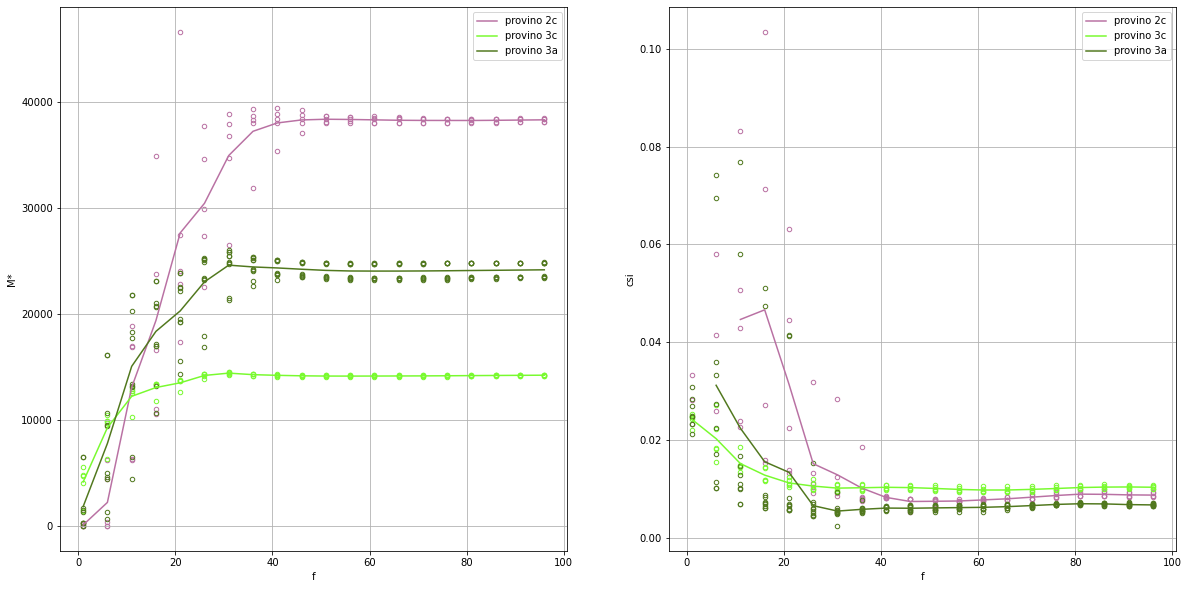

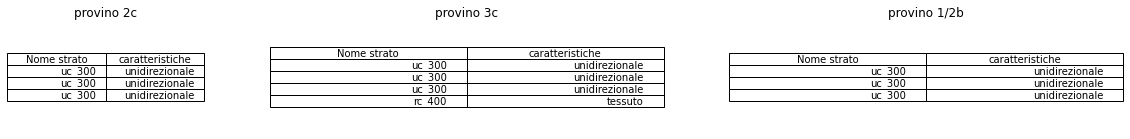

In [7]:
fig,ax = plt.subplots(1,2,figsize=(20,10))

plottaggio(data_provino_2c,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_3c,ax[0],ax[1],f_min = f_min,flag_colore = 1)
#plottaggio(data_provino_1_2b,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_3a,ax[0],ax[1],f_min = f_min,flag_colore = 1)

ax[1].legend(['provino 2c','provino 3c','provino 3a'])
ax[0].legend(['provino 2c','provino 3c','provino 3a'])
#ax[0].set_ylim([0,50000])
plt.show()

fig,ax = plt.subplots(1,3,figsize=(20,2),gridspec_kw=gs_kw)
columns = ('Nome strato','caratteristiche')
ax[0].table(cellText=[ply['meta'] for ply in laminato_provino_2c['struttura']],colLabels=columns,loc='center')
ax[0].axis('off')
ax[0].set_title('provino 2c')
ax[1].table(cellText=[ply['meta'] for ply in laminato_provino_3c['struttura']],colLabels=columns,loc='center')
ax[1].axis('off')
ax[1].set_title('provino 3c')
ax[2].table(cellText=[ply['meta'] for ply in laminato_provino_1_2b['struttura']],colLabels=columns,loc='center')
ax[2].axis('off')
ax[2].set_title('provino 1/2b')
plt.show()


## Tessuto RC 400

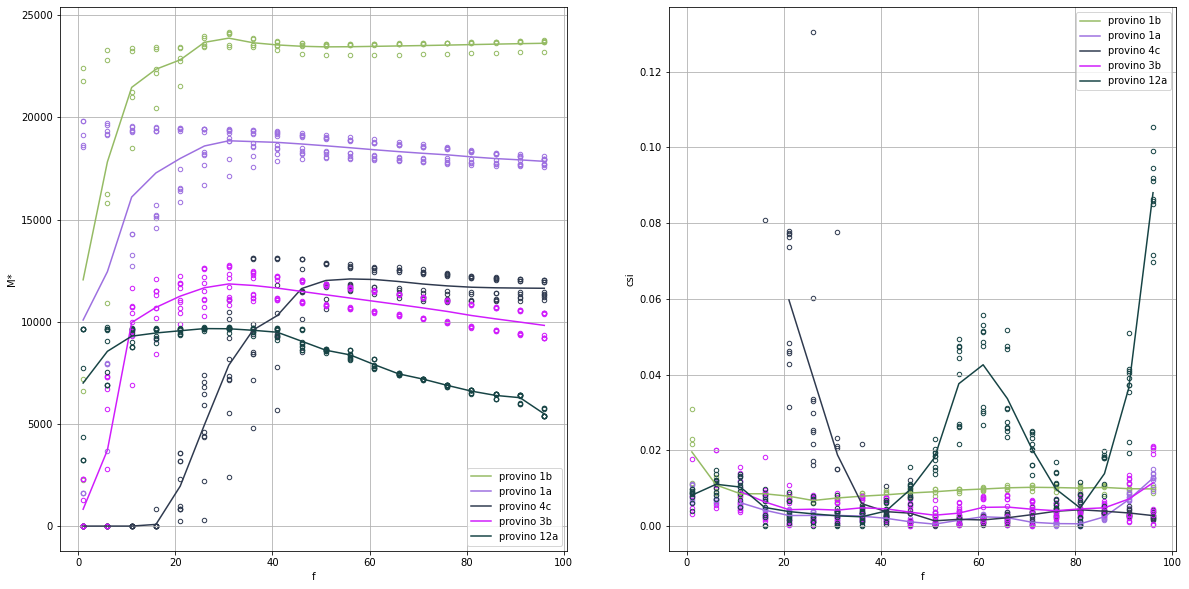

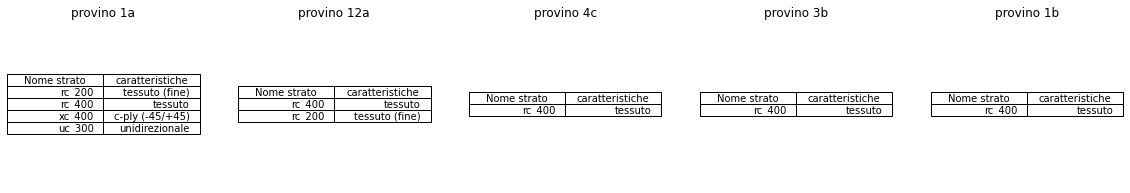

In [8]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
plottaggio(data_provino_1b,ax[0],ax[1],f_min = f_min,flag_colore = 1)
# plottaggio(data_provino_1a_old,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_1a,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_4c,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_3b,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_12a,ax[0],ax[1],f_min = f_min,flag_colore = 1)

ax[1].legend(['provino 1b','provino 1a','provino 4c','provino 3b','provino 12a'])
ax[0].legend(['provino 1b','provino 1a','provino 4c','provino 3b','provino 12a'])
plt.show()

fig,ax = plt.subplots(1,5,figsize=(20,3))
ax[0].table(cellText=[ply['meta'] for ply in laminato_provino_1b['struttura']],colLabels=columns,loc='center')
ax[0].axis('off')
ax[0].set_title('provino 1a')
ax[1].table(cellText=[ply['meta'] for ply in laminato_provino_1a['struttura']],colLabels=columns,loc='center')
ax[1].axis('off')
ax[1].set_title('provino 12a')
ax[2].table(cellText=[ply['meta'] for ply in laminato_provino_4c['struttura']],colLabels=columns,loc='center')
ax[2].axis('off')
ax[2].set_title('provino 4c')
ax[3].table(cellText=[ply['meta'] for ply in laminato_provino_3b['struttura']],colLabels=columns,loc='center')
ax[3].axis('off')
ax[3].set_title('provino 3b')
ax[4].table(cellText=[ply['meta'] for ply in laminato_provino_12a['struttura']],colLabels=columns,loc='center')
ax[4].axis('off')
ax[4].set_title('provino 1b')
plt.show()


# Insieme

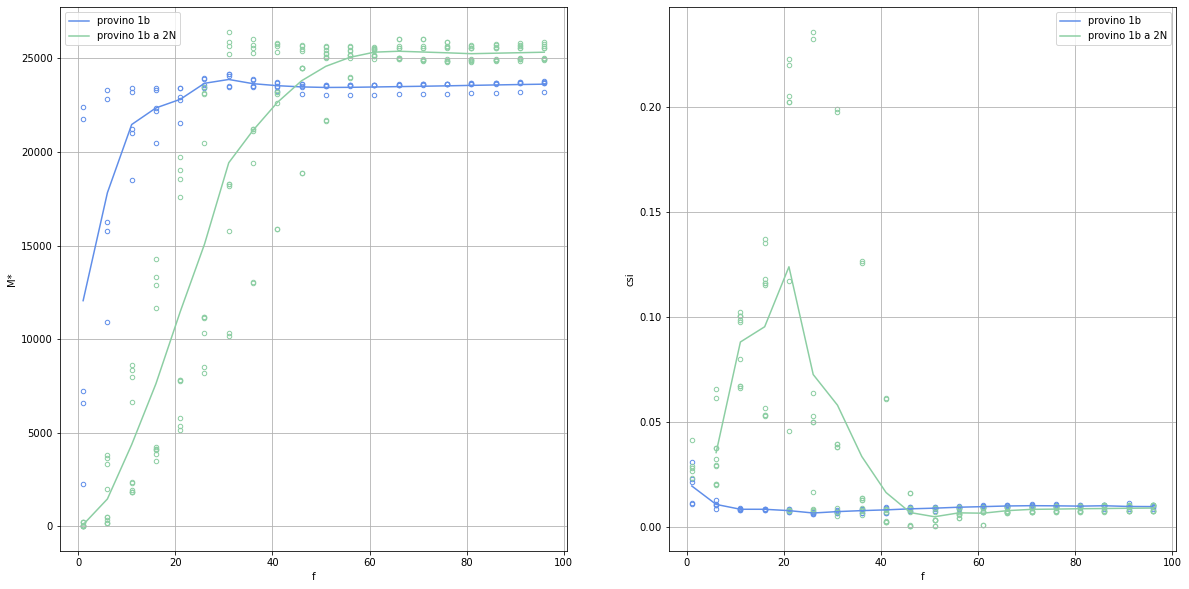

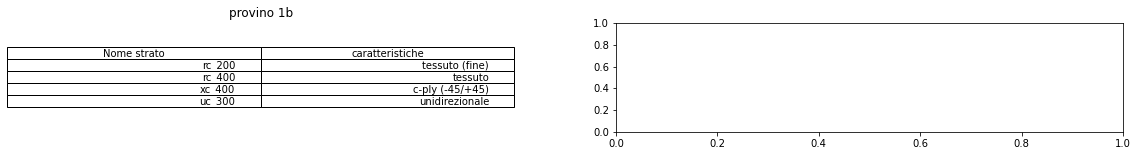

In [9]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
plottaggio(data_provino_1b,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_1b_2N,ax[0],ax[1],f_min = f_min,flag_colore = 1)

ax[1].legend(['provino 1b','provino 1b a 2N'])
ax[0].legend(['provino 1b','provino 1b a 2N'])
plt.show()

fig,ax = plt.subplots(1,2,figsize=(20,2))

ax[0].table(cellText=[ply['meta'] for ply in laminato_provino_1b['struttura']],colLabels=columns,loc='center')
ax[0].axis('off')
ax[0].set_title('provino 1b')

plt.show()


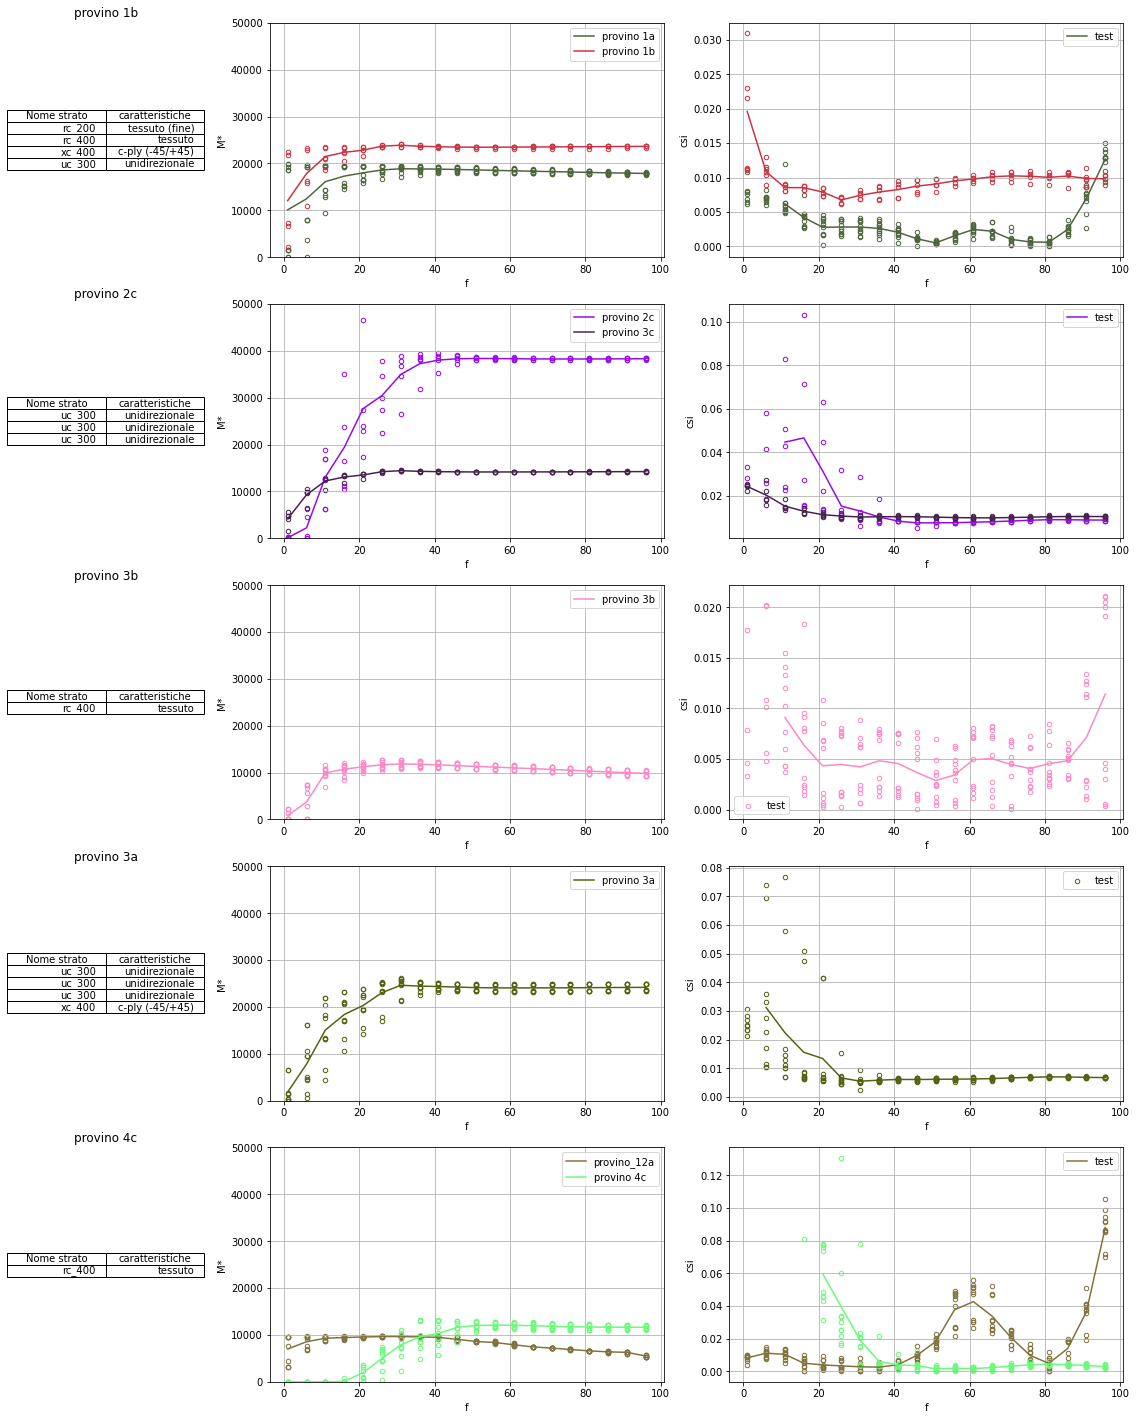

In [10]:
fig,ax = plt.subplots(5,3,figsize=(20,5*5),gridspec_kw=gs_kw)
y_lim = 50000
f_lim = 40
data = []

ax[0][0].table(cellText=[ply['meta'] for ply in laminato_provino_1b['struttura']],colLabels=columns,loc='center')
ax[0][0].axis('off')
ax[0][0].set_title('provino 1b')
plottaggio(data_provino_1a,ax[0][1],ax[0][2],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_1b,ax[0][1],ax[0][2],f_min = f_min,flag_colore = 1)
ax[0][1].legend(['provino 1a','provino 1b'])
ax[0][1].set_ylim([0,y_lim])
data.append({'valori':media(data_provino_1b,f_lim),'name':'provino 1b'})
data.append({'valori':media(data_provino_1a,f_lim),'name':'provino 1a'})

ax[1][0].table(cellText=[ply['meta'] for ply in laminato_provino_2c['struttura']],colLabels=columns,loc='center')
ax[1][0].axis('off')
ax[1][0].set_title('provino 2c')
plottaggio(data_provino_2c,ax[1][1],ax[1][2],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_3c,ax[1][1],ax[1][2],f_min = f_min,flag_colore = 1)
ax[1][1].legend(['provino 2c','provino 3c'])
ax[1][1].set_ylim([0,y_lim])
data.append({'valori':media(data_provino_2c,f_lim),'name':'provino 2c'})

ax[2][0].table(cellText=[ply['meta'] for ply in laminato_provino_3b['struttura']],colLabels=columns,loc='center')
ax[2][0].axis('off')
ax[2][0].set_title('provino 3b')
plottaggio(data_provino_3b,ax[2][1],ax[2][2],f_min = f_min,flag_colore = 1)
ax[2][1].legend(['provino 3b'])
ax[2][1].set_ylim([0,y_lim])
data.append({'valori':media(data_provino_3b,f_lim),'name':'provino 3b'})

ax[3][0].table(cellText=[ply['meta'] for ply in laminato_provino_3a['struttura']],colLabels=columns,loc='center')
ax[3][0].axis('off')
ax[3][0].set_title('provino 3a')
plottaggio(data_provino_3a,ax[3][1],ax[3][2],f_min = f_min,flag_colore = 1)
ax[3][1].legend(['provino 3a'])
ax[3][1].set_ylim([0,y_lim])
#y_lim = 45000
data.append({'valori':media(data_provino_3a,f_lim),'name':'provino 3a'})

ax[4][0].table(cellText=[ply['meta'] for ply in laminato_provino_4c['struttura']],colLabels=columns,loc='center')
ax[4][0].axis('off')
ax[4][0].set_title('provino 4c')
plottaggio(data_provino_12a,ax[4][1],ax[4][2],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_4c,ax[4][1],ax[4][2],f_min = f_min,flag_colore = 1)
ax[4][1].legend(['provino_12a','provino 4c'])
ax[4][1].set_ylim([0,y_lim])
data.append({'valori':media(data_provino_12a,f_lim),'name':'provino 12a'})
data.append({'valori':media(data_provino_4c,f_lim),'name':'provino 4c'})

plt.show()


In [11]:
data

[{'valori': (0.00965382442639741, 23528.91666666667), 'name': 'provino 1b'},
 {'valori': (0.0028646577043517094, 18298.196666666667), 'name': 'provino 1a'},
 {'valori': (0.008223937209991686, 38278.138333333336), 'name': 'provino 2c'},
 {'valori': (0.005082066744300793, 10740.094583333334), 'name': 'provino 3b'},
 {'valori': (0.0064868588154810055, 24131.096666666665), 'name': 'provino 3a'},
 {'valori': (0.026587995422579155, 7476.834916666666), 'name': 'provino 12a'},
 {'valori': (0.002972308004512972, 11692.833666666667), 'name': 'provino 4c'}]

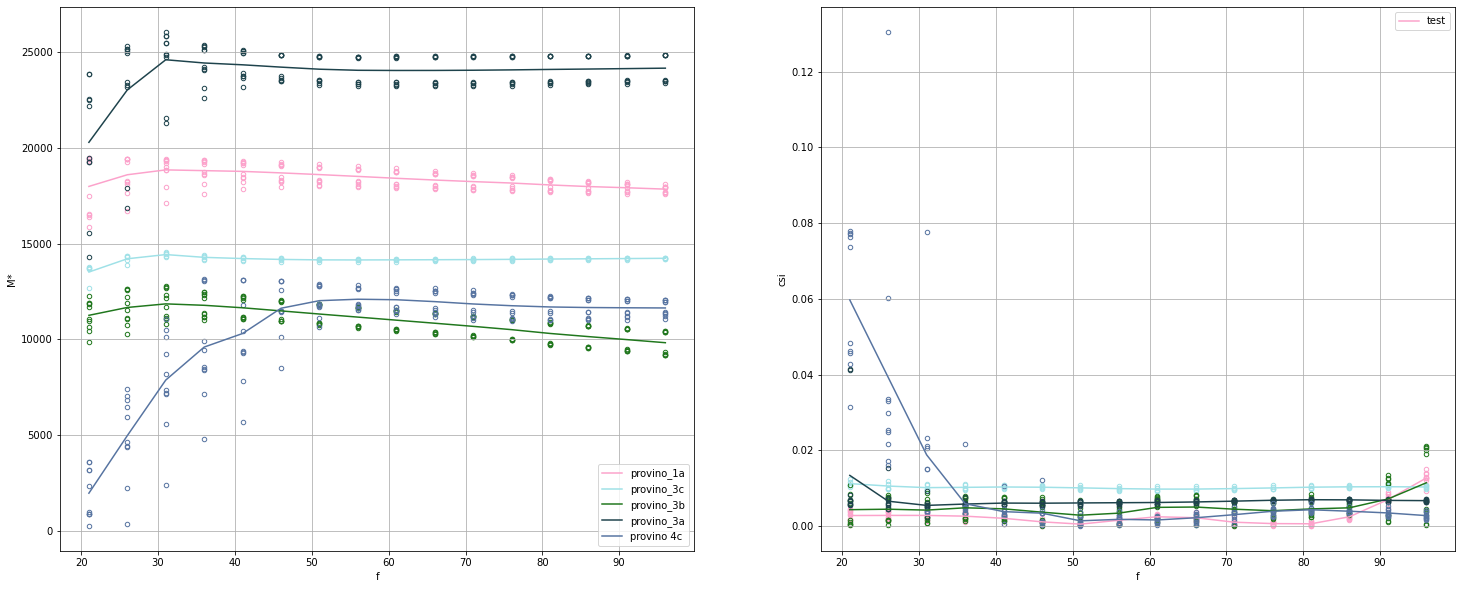

In [12]:
_,ax = plt.subplots(1,2,figsize=(25,10))
f_min = 20
plottaggio(data_provino_1a,ax[0],ax[1],f_min = f_min,flag_colore = 1)
#plottaggio(data_provino_1b,ax[0],ax[1],f_min = f_min,flag_colore = 1)

#plottaggio(data_provino_2c,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_3c,ax[0],ax[1],f_min = f_min,flag_colore = 1)

plottaggio(data_provino_3b,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_3a,ax[0],ax[1],f_min = f_min,flag_colore = 1)
#plottaggio(data_provino_12a,ax[0],ax[1],f_min = f_min,flag_colore = 1)
plottaggio(data_provino_4c,ax[0],ax[1],f_min = f_min,flag_colore = 1)
ax[0].legend(['provino_1a','provino_3c','provino_3b','provino_3a','provino 4c'])

plt.show()

In [1]:
_,ax = plt.subplots(figsize=(20,20))

data_provino_1a.loc[name[i]].plot.scatter(x='f',y='F',ax = ax,label='$F [N]$',color='none',edgecolors = 'r')

ax.legend()

plt.show()

NameError: name 'plt' is not defined